In [1]:
import zipfile 

 # Download zip file of pizza_steak images 
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

 # Unzip the downloaded file
 
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()


--2021-10-11 17:49:28--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.69.128, 64.233.183.128, 173.194.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   127MB/s    in 0.8s    

2021-10-11 17:49:29 (127 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



In [2]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

In [3]:
import os

Image shape: (512, 512, 3)


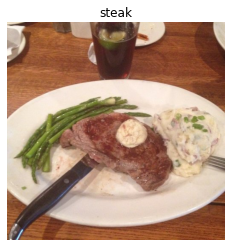

In [4]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

Image shape: (384, 512, 3)


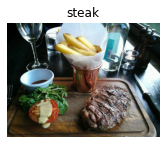

In [5]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/", "steak")


Image shape: (384, 512, 3)


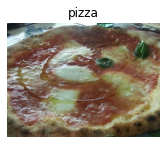

In [6]:
plt.subplot(1,2,1)
pizza_img=view_random_image("pizza_steak/train/", "pizza")

**Preprocess the data (prepare it for a model)**

In [7]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [8]:

# Create train and test data generators and rescale the data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [9]:
# Trun into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32)

test_data=test_datagen.flow_from_directory(directory=test_dir,target_size=(224,224),
                                           class_mode='binary',
                                           batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [10]:
# Smaple of the training data batch
images,labels=train_data.next()
len(images),len(labels)

(32, 32)

In [11]:
images[:2],images[0].shape

(array([[[[0.01960784, 0.03137255, 0.00392157],
          [0.03137255, 0.04313726, 0.01568628],
          [0.01960784, 0.03137255, 0.00392157],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.02352941, 0.03529412, 0.00784314],
          [0.03137255, 0.04313726, 0.01568628],
          [0.03137255, 0.04313726, 0.01568628],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.05882353, 0.07058824, 0.04313726],
          [0.01960784, 0.03137255, 0.00392157],
          [0.02352941, 0.03529412, 0.00784314],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.6117647 , 0.6509804 , 0.60784316],
          [0.63137

In [12]:
images[7].shape

(224, 224, 3)

In [13]:
labels

array([0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

**Create a CNN model**

In [25]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [26]:
# Create

model_3=Sequential([
                    Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           padding='valid',
                           activation='relu',
                           input_shape=(224,224,3)),
                    Conv2D(10,3,activation='relu'),
                    Conv2D(10,3,activation='relu'),
                    Flatten(),
                    Dense(1,activation='sigmoid')
                     
])

In [27]:
  # Compile

  model_3.compile(loss='binary_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy']
                  )

In [28]:
len(train_data),len(test_data)

(47, 16)

In [29]:
# Fit the Model
history_3= model_3.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 12s 251ms/step - loss: 6.6327 - accuracy: 0.5787 - val_loss: 0.6197 - val_accuracy: 0.6800
Epoch 2/5
47/47 [==============================] - 12s 245ms/step - loss: 0.5674 - accuracy: 0.7227 - val_loss: 0.5197 - val_accuracy: 0.7520
Epoch 3/5
47/47 [==============================] - 12s 246ms/step - loss: 0.4678 - accuracy: 0.7847 - val_loss: 0.4118 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 12s 247ms/step - loss: 0.3494 - accuracy: 0.8627 - val_loss: 0.3969 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 12s 250ms/step - loss: 0.2663 - accuracy: 0.9007 - val_loss: 0.4070 - val_accuracy: 0.8140


In [30]:
# Summary
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_1 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


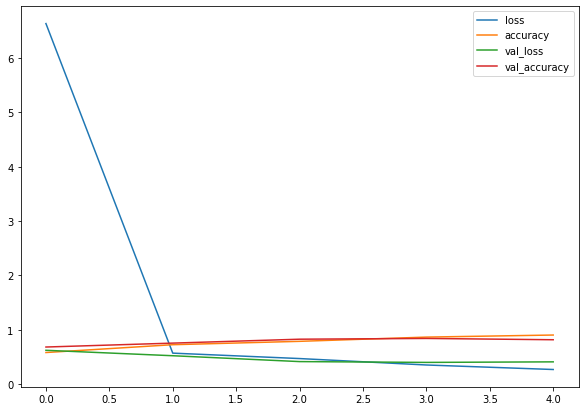

In [33]:
# Evalaute our Model
import pandas as pd
pd.DataFrame(history_3.history).plot(figsize=(10,7));

In [39]:
 # Plot the validation and training curves separately

 def plot_loss_curves(history):
   
   loss=history.history['loss']
   val_loss=history.history['val_loss']

   accuracy=history.history['accuracy']
   val_accuracy=history.history['val_accuracy']

   epochs=range(len(history.history['loss']))

   # Plot loss

   plt.plot(epochs,loss,label='training_loss')
   plt.plot(epochs,val_loss,label='val_loss')
   plt.title('loss')
   plt.xlabel('epochs')
   plt.legend

  # plot accuracy
   plt.figure()
   plt.plot(epochs,accuracy,label='training_accuraccy')
   plt.plot(epochs,val_accuracy,label='val_accuracy')
   plt.title("accuracy")
   plt.xlabel('epochs')
   plt.legend();

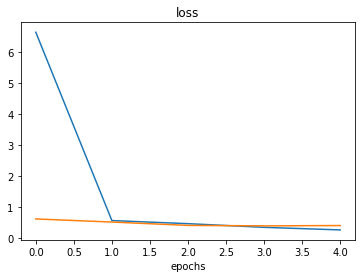

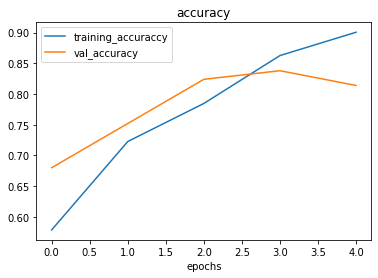

In [40]:
# Loss and Accuracy curve

plot_loss_curves(history_3)

it looks like our model is overfitting the training dataset.

In [42]:
# Create the model 

model_4=Sequential([
                    Conv2D(filters=10,
                           kernel_size=3,activation='relu',
                           input_shape=(224,224,3)),
                    MaxPool2D(pool_size=2),
                    Conv2D(10,3,activation='relu'),
                    MaxPool2D(),
                    Conv2D(10,3,activation='relu'),
                    MaxPool2D(),
                    Flatten(),
                    Dense(1,activation='sigmoid')
                     
])

In [43]:
# Compile the Model

model_4.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

In [45]:
# Fit he model

history_4=model_4.fit(train_data,epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 224ms/step - loss: 0.6139 - accuracy: 0.6680 - val_loss: 0.5026 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 10s 216ms/step - loss: 0.4823 - accuracy: 0.7833 - val_loss: 0.4057 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 10s 216ms/step - loss: 0.4245 - accuracy: 0.8153 - val_loss: 0.3773 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 10s 215ms/step - loss: 0.4045 - accuracy: 0.8187 - val_loss: 0.3908 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 10s 214ms/step - loss: 0.3885 - accuracy: 0.8253 - val_loss: 0.3561 - val_accuracy: 0.8480


In [46]:
# Check out the model architecture
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6760)             

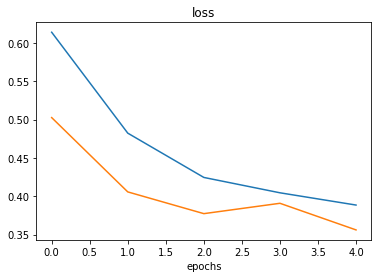

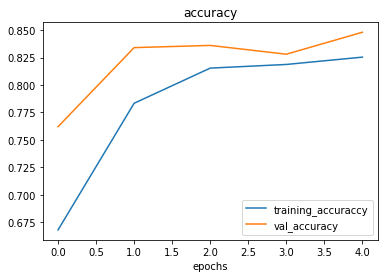

In [47]:
# Plot loss curves of model_4 results
plot_loss_curves(history_4)

**Data Agumentaion**

In [49]:
# Create ImageDataGenerator training instance with data Agumentation

train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=.2,
                                           shear_range=.2,
                                           zoom_range=.2,
                                           width_shift_range=.2,
                                           height_shift_range=.3,
                                           horizontal_flip=True)
  
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [61]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) 

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) 

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [62]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

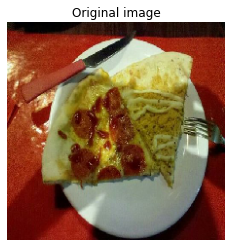

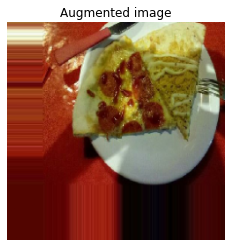

In [63]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [64]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [65]:

# Create the model 
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
  
])

# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_5 = model_5.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 531ms/step - loss: 0.6465 - accuracy: 0.6407 - val_loss: 0.4793 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 24s 517ms/step - loss: 0.5853 - accuracy: 0.7033 - val_loss: 0.4896 - val_accuracy: 0.7760
Epoch 3/5
47/47 [==============================] - 24s 514ms/step - loss: 0.5610 - accuracy: 0.7140 - val_loss: 0.4454 - val_accuracy: 0.8000
Epoch 4/5
47/47 [==============================] - 24s 519ms/step - loss: 0.5553 - accuracy: 0.7273 - val_loss: 0.4179 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 24s 521ms/step - loss: 0.5430 - accuracy: 0.7253 - val_loss: 0.5005 - val_accuracy: 0.7680


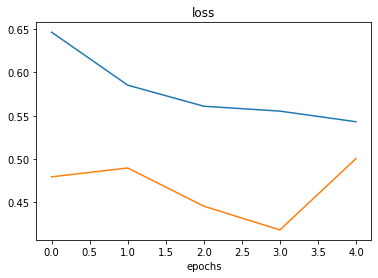

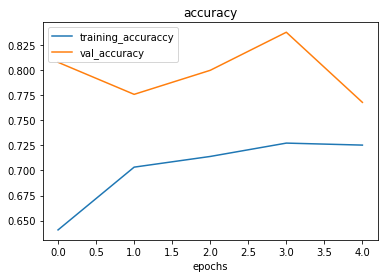

In [66]:
plot_loss_curves(history_5)

In [69]:
# Create a CNN model 
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 546ms/step - loss: 0.6773 - accuracy: 0.5560 - val_loss: 0.5803 - val_accuracy: 0.6920
Epoch 2/5
47/47 [==============================] - 25s 536ms/step - loss: 0.5804 - accuracy: 0.7213 - val_loss: 0.4254 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 25s 532ms/step - loss: 0.5409 - accuracy: 0.7420 - val_loss: 0.3872 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 25s 536ms/step - loss: 0.4995 - accuracy: 0.7680 - val_loss: 0.3480 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 25s 535ms/step - loss: 0.4796 - accuracy: 0.7773 - val_loss: 0.3302 - val_accuracy: 0.8520


In [70]:
model_6.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 28090)            

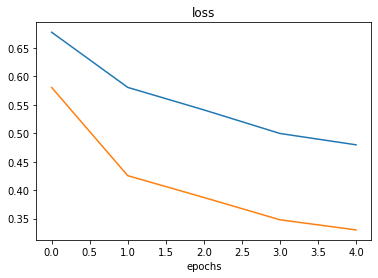

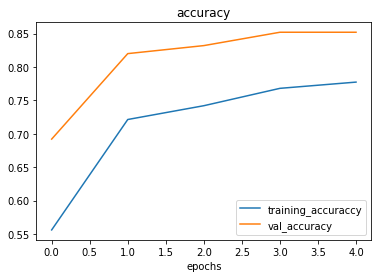

In [71]:
plot_loss_curves(history_6)

**Making a prediction with our trained model**

In [73]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['.DS_Store' 'pizza' 'steak']


In [74]:
# Classes we're working with
print(class_names)

['.DS_Store' 'pizza' 'steak']


--2021-10-11 20:59:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2021-10-11 20:59:42 (32.4 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



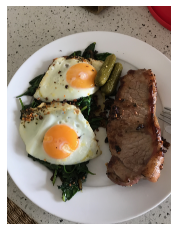

In [84]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [85]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [88]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [89]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [90]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [91]:

# Make a prediction on custom image tensor
pred = model_6.predict(steak)
pred

array([[0.79386616]], dtype=float32)

In [92]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'pizza'

In [93]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

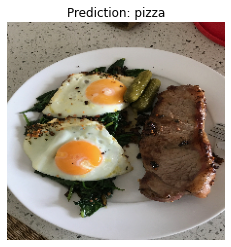

In [94]:
# Test our model on a custom image
pred_and_plot(model_6, "03-steak.jpeg", class_names)

--2021-10-11 21:41:36--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.2’

03-pizza-dad.jpeg.2 100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2021-10-11 21:41:36 (41.9 MB/s) - ‘03-pizza-dad.jpeg.2’ saved [2874848/2874848]



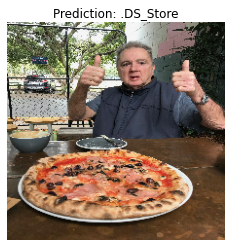

In [96]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_6, "03-pizza-dad.jpeg", class_names)